# 1. Learning from Data. Introduction to Regression.

In this section we give an introduction to the method of linear regression applied to a simple one dimensional
data set. We explain as well the formal theory and derive results concerning existence of unique minimizers
and how to write code for gradient descent when we seek to minimize a convex functional without an explicit
solution.

### Topics:

#### 1.0 Mathematical Formulation
#### 1.1 Regression. Linear Regression with $L^P$ and the special case of $p=2$. 
#### 1.2 Gradient descent for solving minimiziation problems. 
#### 1.3 Concrete example in Python. 

In this first lecture, we are going to look at a very simple example where we have a variable $y$ we wish to predict, along with
a single feature $x$. We will then generalize this to higher dimensions.

## 1.0 Mathematical Formulation

![alt text](../img/regression.png "Title")

For regression, or our goal is to find $x \mapsto f(x)$ which approximates $y$ "well", where $x \in X$ is a collection of features. In the case of predicting virality of an article, examples
of x could be section of the article, time of day, etc. Thus our goal is to find $f:X \to Y$ such that
\begin{equation}
f^*(x) = \textrm{argmin}_{f \in L^p} |y - f(x)|^p = \textrm{argmin}_{f \in L^p} \sum_{i=1}^N |y_i - f(x_i)|^p.
\end{equation}



The most common choice of $p$ above is $p=2$, although occasionally people may use $p=1$ for reasons we explain below. 

Some of advantages of choosing $p=2$ are

1. $\beta \mapsto \mathcal{L}(\beta)$ is strictly convex, and therefore has a unique minimum.
2. Minimizing $\mathcal{L}_2(\beta)$ is equivalent to maximizing log-likelihood assuming a Gaussian
prior on the initial data. This is reasonable because of the Central Limit Theorem when one has
a large number of data points (This will be explained more below).
3. When $p=2$, $\mathcal{L}_2$ is less sensitive to small perturbations in the data. 
And why should we assume the errors of linear models are independently and identically normally distributed? 


$L^2$ also has the property that for each fixed $x_i$, we are trying to find the
mean of $y_i$ over all those possible values. i.e.

\begin{equation}\label{minme}\min_{f \in L^2 }|y_i - f(x)|^2 \end{equation}
is minimized when $f(x) = \frac{1}{N}\sum_{i=1}^N y_i$. While for $L^1$ we try to approximate the median (exercise: Try to show this. Hint. Take a derivative).

Why is $L^2$ any better? 

Built-in feature selection is frequently mentioned as a useful property of the L1-norm, which the L2-norm does not. This is actually a result of the L1-norm, which tends to produces sparse coefficients (explained below). Suppose the model have 100 coefficients but only 10 of them have non-zero coefficients, this is effectively saying that “the other 90 predictors are useless in predicting the target values”. L2-norm produces non-sparse coefficients, so does not have this property.




## 1.1 Linear Regression

The simplest example is when we assume the ansatz
\begin{equation}
f(x) = \beta \cdot X,
\end{equation}
where $\beta \in \mathbb{R}^{d}$, ie. we assume a linear function of $X$. The problem of minimizing the $L^2$ norm subject to the above linear constraint is known *Linear Regression*.




It turns out that when $p=2$ we have analytical solution to the minimization problem, which we show below.  

**Claim:** When $p=2$ then we have
$$ \beta = (X^TX)^{-1}X^T y.$$



*Proof:* We write the above as

\begin{equation}\mathcal{L}_2(\beta) : = \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2.\end{equation}

Then we have

\begin{align}
\frac{\partial \mathcal{L}}{\partial \beta_j}  = \frac{2}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i) x_j. \end{align}

Setting $\frac{\partial \mathcal{L}}{\partial \beta_j} = 0$, we get for the matrix equation 

\begin{equation}
\frac{1}{N} \sum_{i=1}^N (\beta \cdot x_i)x_{ij} = \frac{1}{N} \sum_{i=1}^N y_ix_{ij}.
\end{equation}
Rewrting this equation yields

\begin{equation}
 X^T X \beta= X^T y.
\end{equation}
Solving for $\beta$ yields
\begin{equation} \beta = (X^TX)^{-1}X^Ty.\end{equation}






## 1. 2 Gradient Descent

![alt text](../img/levelsets.png "Title")

In general when we are solving the problem for general $p$, we don't have an analytical solution and therefore must use the method of **gradient descent**. 

In the continuous setting, if we have a functional $x \mapsto f(x)$ which is strictly convex and $C^1$, then if we solve 

\begin{equation}
\dot x = - \nabla f(x),
\end{equation}

then it can be shown that $x(t) \to \min_{x} f(x)$. This is easy to see by noting that

\begin{align}
\frac{d}{dt} (x-x_0)^2 = 2 (x-x_0)\cdot \dot x = -2 (x-x_0) \cdot \nabla f(x).\end{align}
When we try to minimize $\mathcal{L}_p$ and don't have an analytical solution, we can solve the method by Gradient Descent, which relies on the convexity of the loss function. 

Then 
\begin{equation}
f(x) - f(x_0)  = \nabla f(x) \cdot (x-x_0) + \frac{1}{2}(x - x_0)^T D^2 f(\xi) (x-x_0).
\end{equation}

\begin{equation}
f(x_0) - f(x)  = \nabla f(x_0) \cdot (x_0-x) + \frac{1}{2}(x - x_0)^T D^2 f(\tilde \xi) (x-x_0).
\end{equation}
This gives us the bound
\begin{equation}
 \nabla f(x) \cdot (x-x_0) \geq m |x-x_0|^2,\end{equation}
 for some $m>0$. Plugging this into the above, we conclude that $|x(t)-x_0| \leq Ce^{-mt}$. 
 
**Theorem:***If $f$ is strictly convex, the minimum of is unique. Moreover any $x_0$ will converge to the minimum expontentially fast under the gradient flow.


**Proof:** This is a consequence of the above calculation. 




##  1. 3 The Discrete Case
 

Recall that for linear regression, our loss function is

\begin{equation}\mathcal{L} (\beta) : = \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2.\end{equation}

Then 
\begin{equation}
 \frac{\partial \mathcal{L} (\beta)}{\partial \beta_j} = -\frac{2}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i) x_{ij},
\end{equation}
so our gradient descent takes the form
\begin{equation}
\beta_{n+1}^j = \beta_n^j + \gamma_n \frac{2}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i) x_{ij}.
\end{equation}

We now have everything we need to run code and see how this works in practice. 
See: https://github.com/mattnedrich/GradientDescentExample


## 1.4 Example of Gradient Descent in Python

![alt text](../img/regressionexample "Title")

In [41]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
pd.set_option('display.max_columns', 500)
%matplotlib inline

The code below is the algorithm for gradient descent - it iterates the above formulas, learning
the coefficients $m$ and $b$ based on some learning rate. We can now visualize how the solution converges

In [9]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')



In [6]:
# Load in some randomly genreates data.

points = genfromtxt("../data/data.csv", delimiter=",")

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


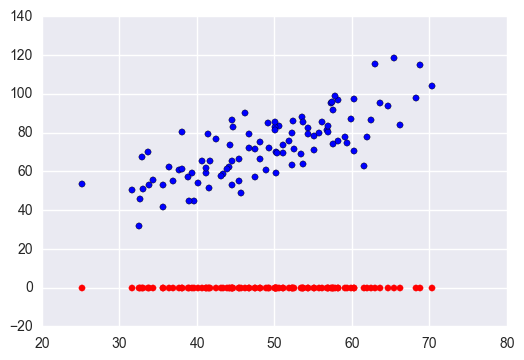

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


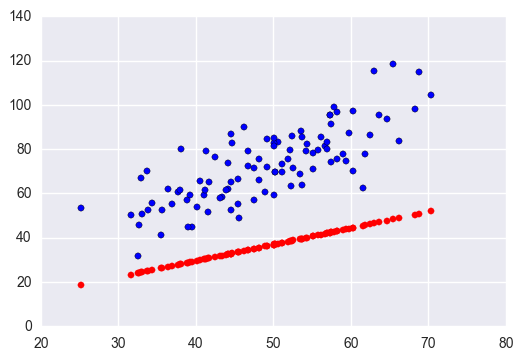

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


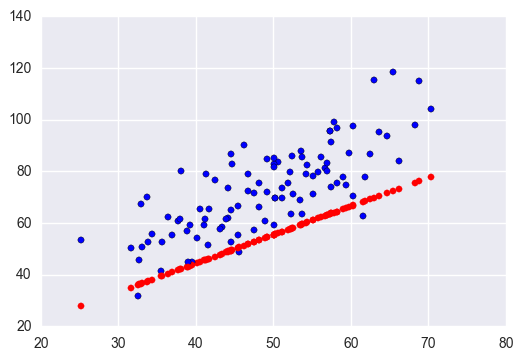

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


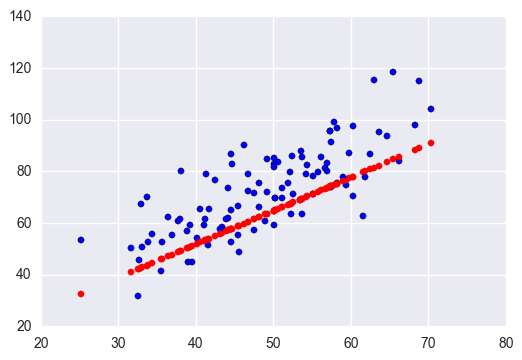

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


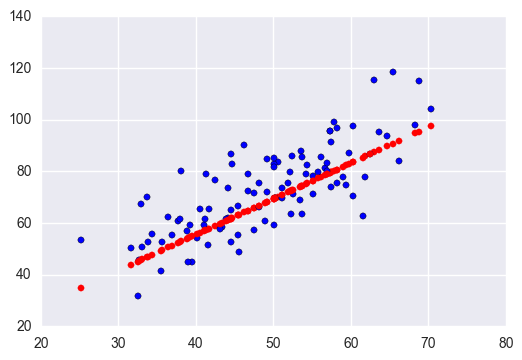

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


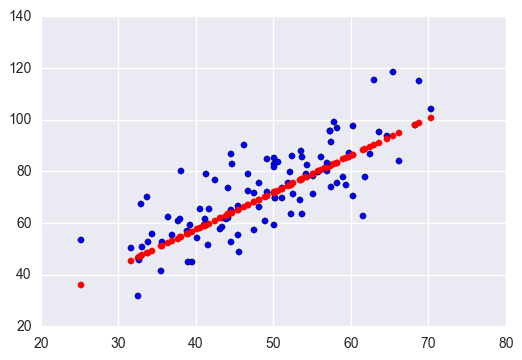

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


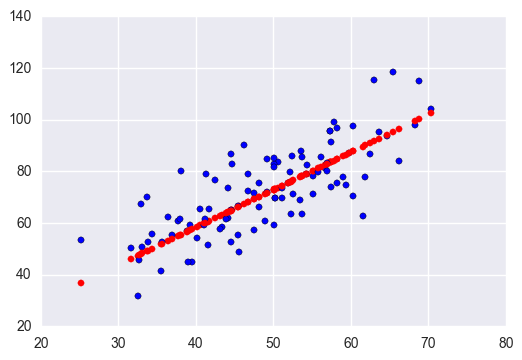

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


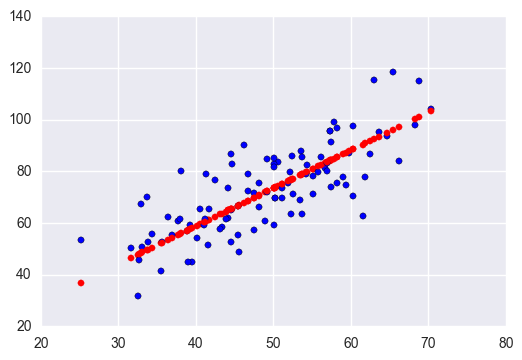

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


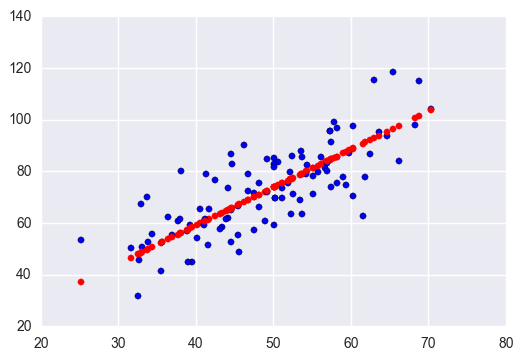

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


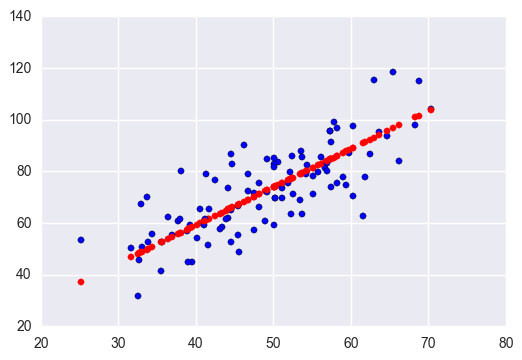

In [10]:
for num in range(0,10):
    run(num)
    plt.show()

# How would we do this in sci-kit learn?

Now that we have this, let's compare it to the solution we obtain from scikitlearn's LinearRegression package

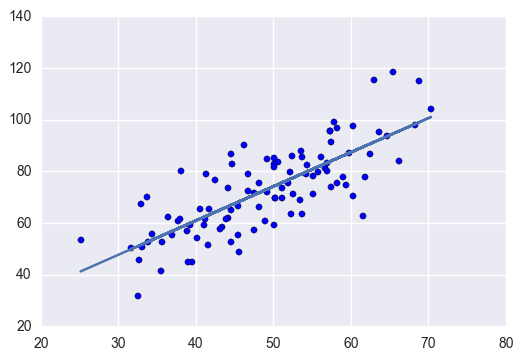

In [68]:
xvals = []
yvals= []

for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        xvals.append(points[i,0])
        yvals.append(points[i,1])
        #plt.scatter(points[i,0],m*points[i,0]+b,color='r')

        
df = pd.DataFrame({'xvals':xvals,'const':1})

clf = LinearRegression()
clf.fit(df,yvals)
plt.plot(xvals, clf.predict(df))


# How would a decision tree look?

Let's see how our model looks if we use a decision tree here instead of a linear model.

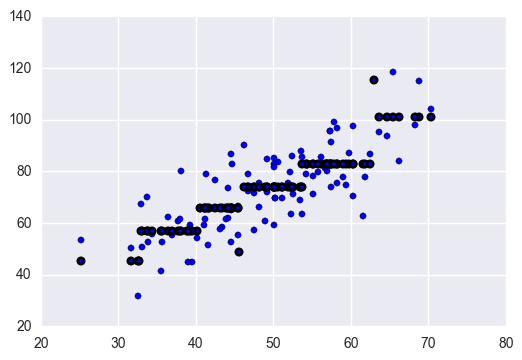

In [82]:
xvals = []
yvals= []
from sklearn.tree import DecisionTreeRegressor

for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        xvals.append(points[i,0])
        yvals.append(points[i,1])
        #plt.scatter(points[i,0],m*points[i,0]+b,color='r')

        
df = pd.DataFrame({'xvals':xvals,'const':1})

clf = DecisionTreeRegressor(max_depth=3)
clf.fit(df,yvals)
plt.scatter(xvals, clf.predict(df),linewidth=2)

# A one dimensional example

Let's set $$y = \sin(x) + \textrm{ noise, } $$

and try to fit a decision tree to it with various depths. 

Automatically created module for IPython interactive environment


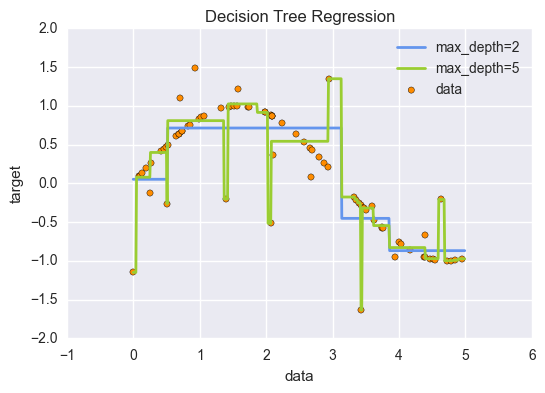

In [90]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_0 = DecisionTreeRegressor(max_depth=1)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_0.fit(X, y)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_0 = regr_0.predict(X_test)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
#plt.plot(X_test, y_0, color="red", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# How do we visualize the tree? 

In [108]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [116]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr_1, feature_names=['x'])

# Depth 1

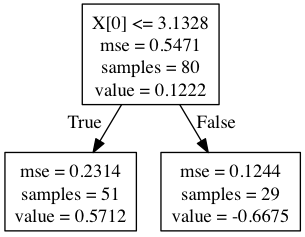

In [122]:
dot_data=export_graphviz(regr_0, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

# Depth 2

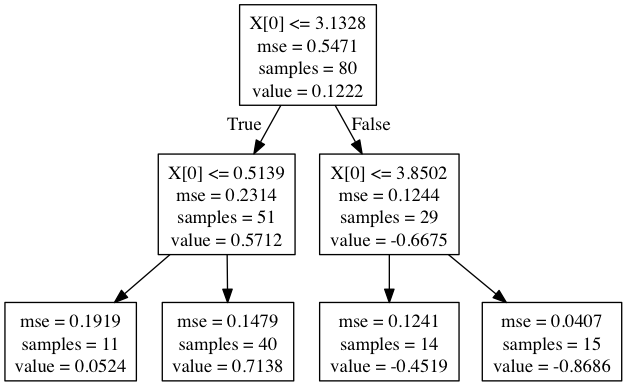

In [120]:
from IPython.display import Image  
dot_data=export_graphviz(regr_1, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

# Depth 5

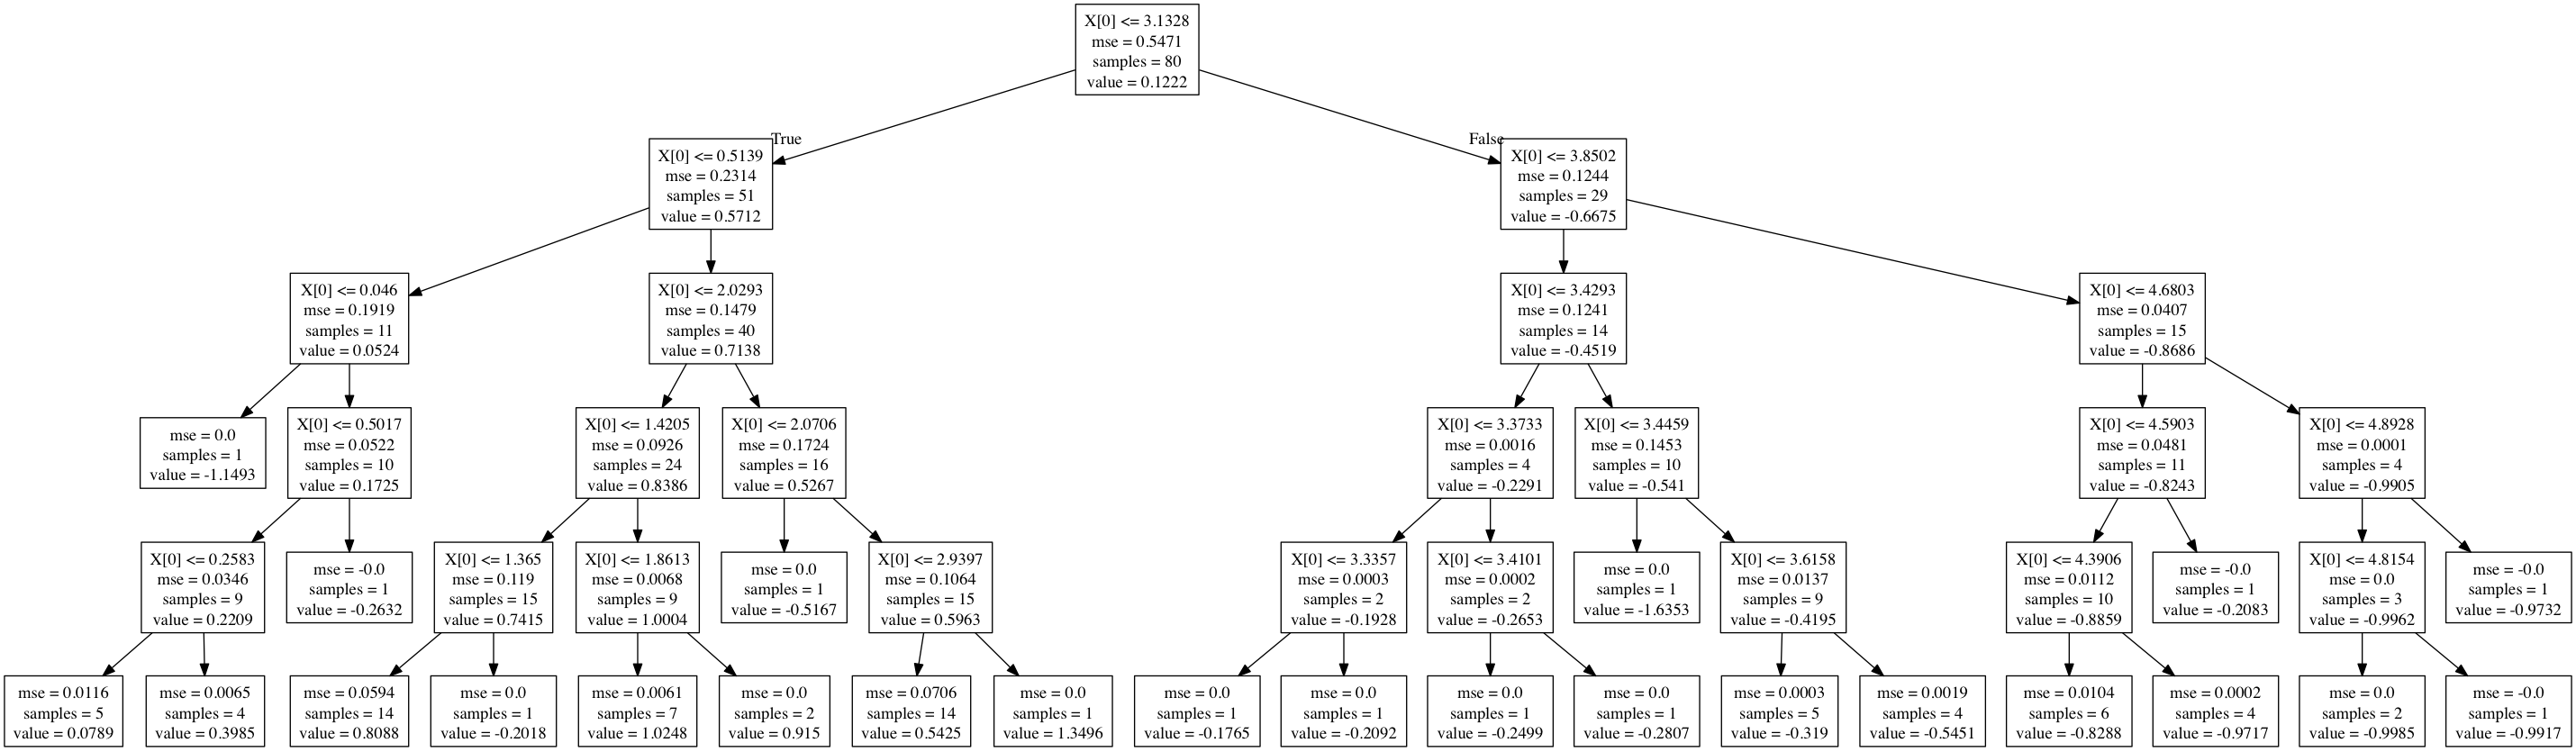

In [121]:
dot_data=export_graphviz(regr_2, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 